Importing Libraries

In [10]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,LeaveOneOut, KFold , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Importing Dataset: Checking NA Values, Cleaning of Dataset to remove errors

In [11]:
le=pd.read_csv('Life_Expectancy_Data.csv')
le.head()

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [12]:
le.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1_to_19_yrs                34
thinness_5_to_9_yrs                 34
Income_composition_of_resources    167
Schooling                          163
Life_expectancy                     10
dtype: int64

In [13]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult_Mortality                  2928 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total_expenditure   

In [14]:
le.columns = le.columns.str.strip()

In [15]:
le['Adult_Mortality'].fillna(np.mean(le['Adult_Mortality']),inplace=True)
le['Alcohol'].fillna(np.mean(le['Alcohol']),inplace=True)
le['Hepatitis_B'].fillna(np.mean(le['Hepatitis_B']),inplace=True)
le['BMI'].fillna(np.mean(le['BMI']),inplace=True)
le['Polio'].fillna(np.mean(le['Polio']),inplace=True)
le['Total_expenditure'].fillna(np.mean(le['Total_expenditure']),inplace=True)
le['Diphtheria'].fillna(np.mean(le['Diphtheria']),inplace=True)
le['GDP'].fillna(np.mean(le['GDP']),inplace=True)
le['Population'].fillna(np.mean(le['Population']),inplace=True)
le['thinness_1_to_19_yrs'].fillna(np.mean(le['thinness_1_to_19_yrs']),inplace=True)
le['thinness_5_to_9_yrs'].fillna(np.mean(le['thinness_5_to_9_yrs']),inplace=True)
le['Income_composition_of_resources'].fillna(np.mean(le['Income_composition_of_resources']),inplace=True)
le['Schooling'].fillna(np.mean(le['Schooling']),inplace=True)
le['Life_expectancy'].fillna(np.mean(le['Life_expectancy']),inplace=True)

In [16]:
le['Status']=le['Status'].map({'Developed':1,'Developing':0})

Applying OneHotEncoding on Qualitative Datasets

In [17]:
le.nunique()

Country                             193
Year                                 16
Status                                2
Adult_Mortality                     426
infant_deaths                       209
Alcohol                            1077
percentage_expenditure             2328
Hepatitis_B                          88
Measles                             958
BMI                                 609
under_five_deaths                   252
Polio                                74
Total_expenditure                   819
Diphtheria                           82
HIV_AIDS                            200
GDP                                2491
Population                         2279
thinness_1_to_19_yrs                201
thinness_5_to_9_yrs                 208
Income_composition_of_resources     626
Schooling                           174
Life_expectancy                     363
dtype: int64

<BarContainer object of 2 artists>

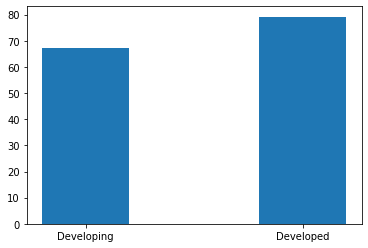

In [69]:
df3 = le.groupby('Status').mean()
status = ('Developing','Developed')
A1 =df3['Life_expectancy']
plt.bar(status, A1,width=0.4)

In [18]:
le['Status']=le['Status'].astype(object)
le1=pd.get_dummies(le,columns=['Status'])
le1.head()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Country,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV_AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling,Life_expectancy,Status_0,Status_1
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1,0
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,1,0
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,1,0
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,1,0
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,1,0


In [20]:
X=le1.iloc[:,0:22]
Y=le1.iloc[:,-3]
X=X.drop(['Country','Life_expectancy'],axis=1)

Splitting Data using Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
alphas=10**np.linspace(20,-4,100)*0.5
lassocv=LassoCV(alphas=alphas)
lassocv.fit(X_train,Y_train)
lassocv.alpha_

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.489856072323164, tolerance: 17.2470454717974
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.30212111119545, tolerance: 17.2470454717974
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.55977715096378, tolerance: 17.2470454717974
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HP\A

0.004348745013088899

Use of Lasso to see Variables that could be dropped

In [23]:
lasso4=Lasso(alpha=lassocv.alpha_)
lasso4.fit(X_train,Y_train)
pred2=lasso4.predict(X_test)
print(pd.Series(lasso4.coef_,index=X.columns))
print(mean_squared_error(Y_test,pred2))

Year                              -1.812662e-03
Adult_Mortality                   -1.914122e-02
infant_deaths                      1.029456e-01
Alcohol                            7.859876e-02
percentage_expenditure             6.969424e-05
Hepatitis_B                       -1.545070e-02
Measles                           -2.225031e-05
BMI                                4.455879e-02
under_five_deaths                 -7.704980e-02
Polio                              3.131570e-02
Total_expenditure                  3.521628e-02
Diphtheria                         4.117030e-02
HIV_AIDS                          -4.843700e-01
GDP                                3.649798e-05
Population                         5.888916e-10
thinness_1_to_19_yrs              -8.330161e-02
thinness_5_to_9_yrs               -1.182272e-02
Income_composition_of_resources    5.211933e+00
Schooling                          6.912228e-01
Status_0                          -1.424122e+00
dtype: float64
17.678568787627363


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.08816e-16): result may not be accurate.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.22692e-17): result may not be accurate.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.56329e-17): result may not be accurate.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.03905e-17): result may not be accurate.



Text(0, 0.5, 'weights')

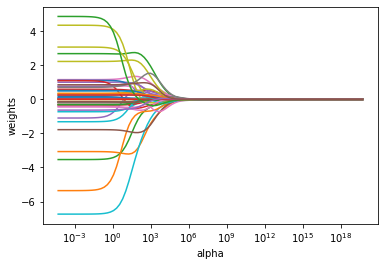

In [66]:
ridge = Ridge()
coefs = []
for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(X,Y)
  coefs.append(ridge.coef_)
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [24]:
lm1=smf.ols('Life_expectancy~Adult_Mortality+infant_deaths+Alcohol+Hepatitis_B+BMI+under_five_deaths+Polio+Diphtheria+HIV_AIDS+thinness_1_to_19_yrs+Income_composition_of_resources+Schooling+Status_0+Status_1',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     999.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:36:08   Log-Likelihood:                -8295.8
No. Observations:                2938   AIC:                         1.662e+04
Df Residuals:                    2924   BIC:                         1.670e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          37.3504      0.382     97.796      0.000      36.602      38.099
Adult_Mortality                    -0.0201      0.001    -25.170      0.000      -0.022      -0.018
infant_deaths                       0.0989      0.008     11.883      0.000       0.083       0.115
Alcohol                             0.0699      0.026      2.709      0.007       0.019       0.121
Hepatitis_B                        -0.0163      0.004     -4.163      0.000      -0.024      -0.009
BMI                                 0.0464      0.005      9.485      0.000       0.037       0.056
under_five_deaths                  -0.0748      0.006    -12.197      0.000      -0.087      -0.063
Polio                               0.0293      0.004      6.512      0.000       0.020       0.038
Diphtheria                          0.0408      0.005      8.625      0.000       0.032       0.050
HIV_AIDS                           -0.4666      0.018    -26.469      0.000      -0.501      -0.432
thinness_1_to_19_yrs               -0.0780      0.024     -3.249      0.001      -0.125      -0.031
Income_composition_of_resources     6.2158      0.631      9.856      0.000       4.979       7.452
Schooling                           0.6740      0.042     16.070      0.000       0.592       0.756
Status_0                           17.6040      0.193     91.444      0.000      17.227      17.982
Status_1                           19.7464      0.264     74.853      0.000      19.229      20.264
==============================================================================
Omnibus:                      125.781   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.839
Skew:                          -0.137   Prob(JB):                     8.08e-81
Kurtosis:                       4.714   Cond. No.                     1.34e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Scaling all Quantitative Values

In [25]:
le1.head()

,Country,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV_AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling,Life_expectancy,Status_0,Status_1
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1,0
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,1,0
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,1,0
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,1,0
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,1,0


In [26]:
le1.shape[0]

2938

In [27]:
le1[['Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI','under_five_deaths','Polio','Total_expenditure','Diphtheria','HIV_AIDS','GDP','Population','thinness_1_to_19_yrs','thinness_5_to_9_yrs','Income_composition_of_resources','Schooling']]=scale(le1[['Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI','under_five_deaths','Polio','Total_expenditure','Diphtheria','HIV_AIDS','GDP','Population','thinness_1_to_19_yrs','thinness_5_to_9_yrs','Income_composition_of_resources','Schooling']],with_mean=True,with_std=True)

In [28]:
lm1=smf.ols('Life_expectancy~Adult_Mortality+infant_deaths+Alcohol+Hepatitis_B+BMI+under_five_deaths+Polio+Diphtheria+HIV_AIDS+thinness_1_to_19_yrs+Income_composition_of_resources+Schooling+Status_0+Status_1',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     999.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:37:06   Log-Likelihood:                -8295.8
No. Observations:                2938   AIC:                         1.662e+04
Df Residuals:                    2924   BIC:                         1.670e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          46.6152      0.076    617.254      0.000      46.467      46.763
Adult_Mortality                    -2.4881      0.099    -25.170      0.000      -2.682      -2.294
infant_deaths                      11.6653      0.982     11.883      0.000       9.740      13.590
Alcohol                             0.2738      0.101      2.709      0.007       0.076       0.472
Hepatitis_B                        -0.3689      0.089     -4.163      0.000      -0.543      -0.195
BMI                                 0.9246      0.097      9.485      0.000       0.733       1.116
under_five_deaths                 -12.0019      0.984    -12.197      0.000     -13.931     -10.073
Polio                               0.6838      0.105      6.512      0.000       0.478       0.890
Diphtheria                          0.9647      0.112      8.625      0.000       0.745       1.184
HIV_AIDS                           -2.3689      0.089    -26.469      0.000      -2.544      -2.193
thinness_1_to_19_yrs               -0.3425      0.105     -3.249      0.001      -0.549      -0.136
Income_composition_of_resources     1.2729      0.129      9.856      0.000       1.020       1.526
Schooling                           2.1998      0.137     16.070      0.000       1.931       2.468
Status_0                           22.2364      0.105    212.368      0.000      22.031      22.442
Status_1                           24.3788      0.160    152.341      0.000      24.065      24.693
==============================================================================
Omnibus:                      125.781   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.839
Skew:                          -0.137   Prob(JB):                     8.08e-81
Kurtosis:                       4.714   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Checking VIF

In [29]:
X1=le1.copy()
X1.drop(['Country','Year','percentage_expenditure','Measles','GDP','Population','Life_expectancy','Status_0','Status_1'],axis=1,inplace=True)
X1=add_constant(X1)
X1 

,const,Adult_Mortality,infant_deaths,Alcohol,Hepatitis_B,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
0,1.0,0.791586,0.268824,-1.172958,-0.705861,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,2.813130,2.773279,-0.725401,-0.579931
1,1.0,0.856072,0.285786,-1.172958,-0.838704,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,2.881408,2.817902,-0.740050,-0.610570
2,1.0,0.831890,0.302749,-1.172958,-0.750142,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,2.926927,2.862526,-0.769349,-0.641209
3,1.0,0.864132,0.328193,-1.172958,-0.617299,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,2.972446,2.929461,-0.803531,-0.671847
4,1.0,0.888314,0.345155,-1.172958,-0.573018,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,4.499494,-0.028022,-0.062024,-0.573018,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,1.037896,1.010651,-1.076989,-0.855681
2934,1.0,4.435009,-0.036503,-0.138640,-3.274163,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,1.128934,1.122210,-1.023274,-0.763764
2935,1.0,-0.739941,-0.044984,-0.044146,-0.351612,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.828375,-0.796600,-0.979326,-0.610570
2936,1.0,4.201249,-0.044984,-0.736246,-0.218769,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.737337,-0.707353,-0.979326,-0.671847


In [30]:
vif_df=pd.DataFrame()
vif_df['feature']=X1.columns
vif_df['VIF']=[variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
print(vif_df)

                            feature         VIF
0                             const    1.000000
1                   Adult_Mortality    1.700742
2                     infant_deaths  170.340290
3                           Alcohol    1.536991
4                       Hepatitis_B    1.383541
5                               BMI    1.707473
6                 under_five_deaths  170.942133
7                             Polio    1.942893
8                 Total_expenditure    1.154980
9                        Diphtheria    2.209029
10                         HIV_AIDS    1.418542
11             thinness_1_to_19_yrs    8.758962
12              thinness_5_to_9_yrs    8.836403
13  Income_composition_of_resources    2.929747
14                        Schooling    3.286410


In [31]:
X1=X1.drop(['under_five_deaths'],axis=1)
vif_df=pd.DataFrame()
vif_df['feature']=X1.columns
vif_df['VIF']=[variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
print(vif_df)

                            feature       VIF
0                             const  1.000000
1                   Adult_Mortality  1.697773
2                     infant_deaths  1.364838
3                           Alcohol  1.504386
4                       Hepatitis_B  1.377211
5                               BMI  1.706179
6                             Polio  1.935161
7                 Total_expenditure  1.154628
8                        Diphtheria  2.169350
9                          HIV_AIDS  1.413908
10             thinness_1_to_19_yrs  8.752444
11              thinness_5_to_9_yrs  8.814212
12  Income_composition_of_resources  2.909407
13                        Schooling  3.282629


In [32]:
X1=X1.drop(['thinness_5_to_9_yrs'],axis=1)
vif_df=pd.DataFrame()
vif_df['feature']=X1.columns
vif_df['VIF']=[variance_inflation_factor(X1.values,i)
              for i in range(len(X1.columns))]
print(vif_df)

                            feature       VIF
0                             const  1.000000
1                   Adult_Mortality  1.695723
2                     infant_deaths  1.344145
3                           Alcohol  1.502289
4                       Hepatitis_B  1.377183
5                               BMI  1.683996
6                             Polio  1.934772
7                 Total_expenditure  1.151674
8                        Diphtheria  2.167308
9                          HIV_AIDS  1.413168
10             thinness_1_to_19_yrs  1.965893
11  Income_composition_of_resources  2.909336
12                        Schooling  3.282366


<Axes: >

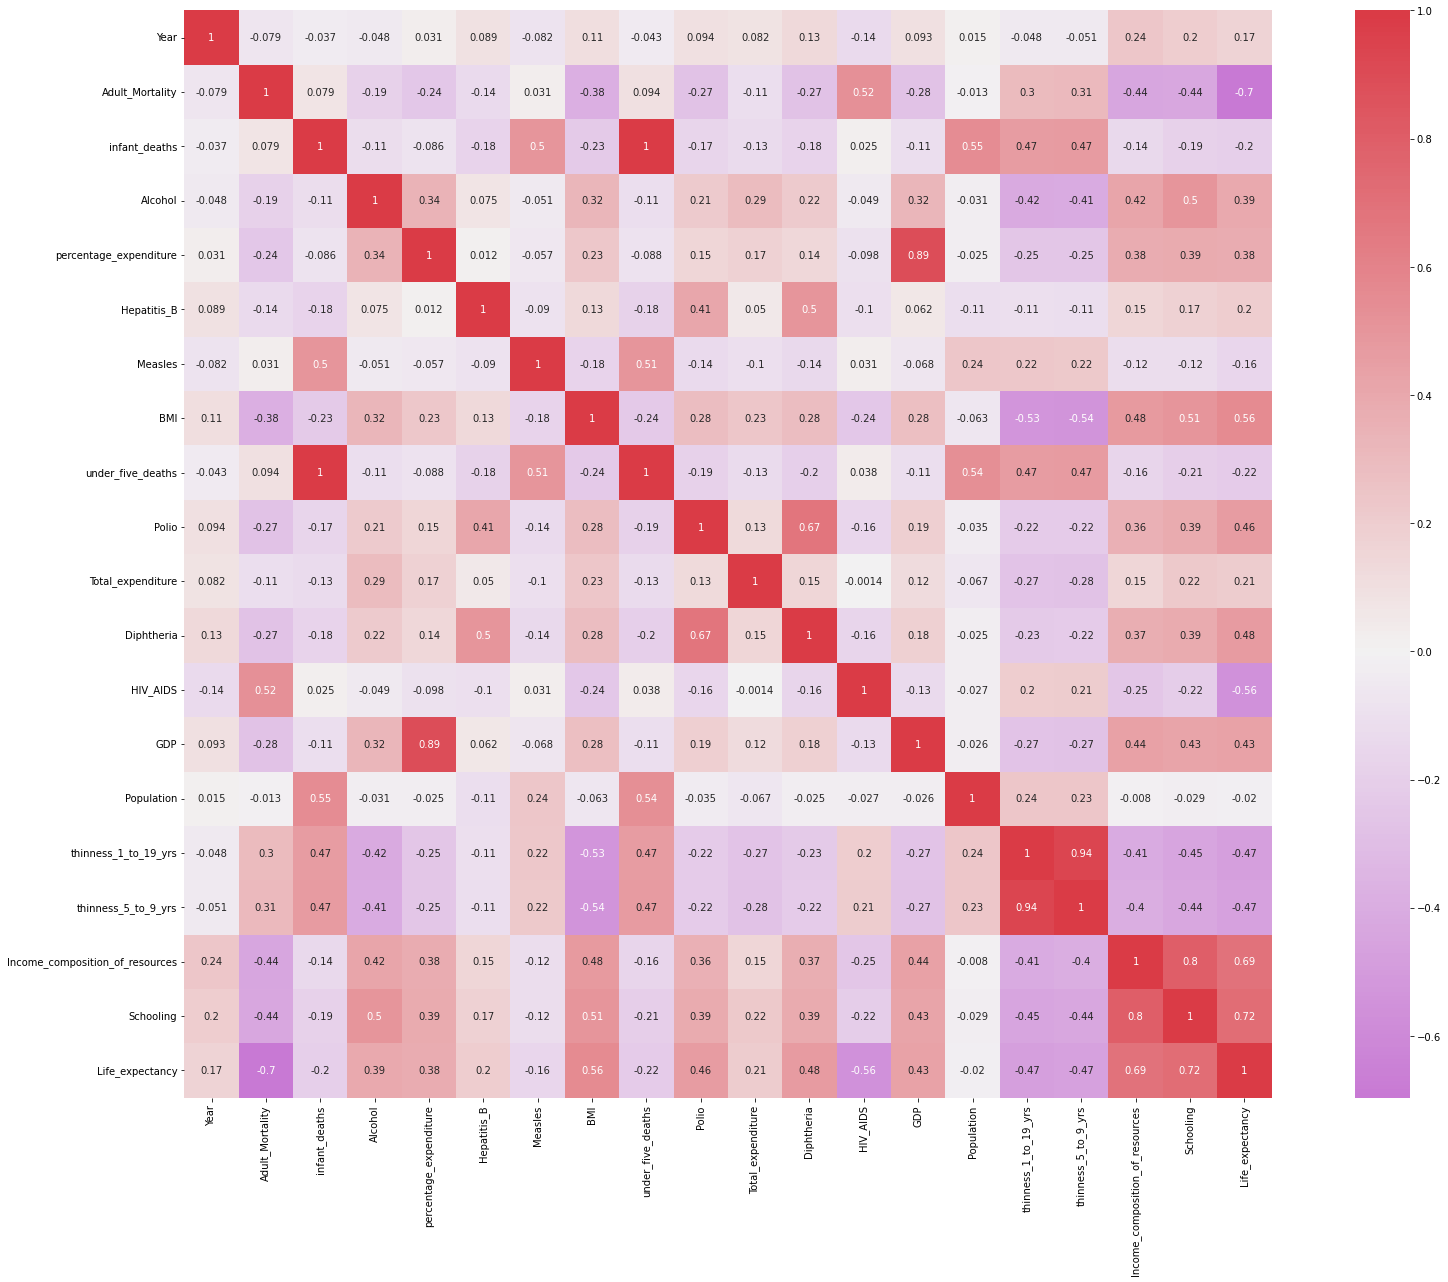

In [68]:
cmap = sns.diverging_palette(300,10,as_cmap=True)
plt.figure(figsize=(30,20))
sns.heatmap(le.corr(),cmap=cmap,center=0,annot=True,square=True)

Checking Non Linear Relationships

In [33]:
lm1=smf.ols('Life_expectancy~Adult_Mortality+I(Adult_Mortality**2)+I(Adult_Mortality**3)+I(Adult_Mortality**4)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1133.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:39:40   Log-Likelihood:                -9412.5
No. Observations:                2938   AIC:                         1.884e+04
Df Residuals:                    2933   BIC:                         1.886e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  72.1291      0.154    468.988      0.000      71.828      72.431
Adult_Mortality           -10.2345      0.265    -38.637      0.000     -10.754      -9.715
I(Adult_Mortality ** 2)    -4.4714      0.154    -28.994      0.000      -4.774      -4.169
I(Adult_Mortality ** 3)     3.1723      0.153     20.787      0.000       2.873       3.472
I(Adult_Mortality ** 4)    -0.4543      0.032    -14.227      0.000      -0.517      -0.392
==============================================================================
Omnibus:                     1210.871   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7428.252
Skew:                          -1.849   Prob(JB):                         0.00
Kurtosis:                       9.856   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm1=smf.ols('Life_expectancy~infant_deaths+I(infant_deaths**2)+I(infant_deaths**3)+I(infant_deaths**4)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.38e-171
Time:                        20:39:47   Log-Likelihood:                -10386.
No. Observations:                2938   AIC:                         2.078e+04
Df Residuals:                    2933   BIC:                         2.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                66.3801      0.191    347.839      0.000      66.006      66.754
infant_deaths           -20.2860      0.699    -29.011      0.000     -21.657     -18.915
I(infant_deaths ** 2)     8.1079      0.388     20.897      0.000       7.347       8.869
I(infant_deaths ** 3)    -0.9244      0.054    -16.999      0.000      -1.031      -0.818
I(infant_deaths ** 4)     0.0318      0.002     14.645      0.000       0.028       0.036
==============================================================================
Omnibus:                      141.019   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.637
Skew:                          -0.547   Prob(JB):                     7.96e-36
Kurtosis:                       3.353   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
lm1=smf.ols('Life_expectancy~Alcohol',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     531.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.78e-108
Time:                        20:39:53   Log-Likelihood:                -10540.
No. Observations:                2938   AIC:                         2.108e+04
Df Residuals:                    2936   BIC:                         2.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2249      0.161    428.834      0.000      68.908      69.541
Alcohol        3.7225      0.161     23.060      0.000       3.406       4.039
==============================================================================
Omnibus:                      253.705   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.725
Skew:                          -0.803   Prob(JB):                     1.38e-70
Kurtosis:                       3.220   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm1=smf.ols('Life_expectancy~Hepatitis_B+I(Hepatitis_B**2)+I(Hepatitis_B**3)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           5.15e-84
Time:                        20:39:58   Log-Likelihood:                -10590.
No. Observations:                2938   AIC:                         2.119e+04
Df Residuals:                    2934   BIC:                         2.121e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              66.4342      0.249    266.996      0.000      65.946      66.922
Hepatitis_B             5.9872      0.342     17.491      0.000       5.316       6.658
I(Hepatitis_B ** 2)     4.4339      0.467      9.498      0.000       3.519       5.349
I(Hepatitis_B ** 3)     0.7672      0.148      5.191      0.000       0.477       1.057
==============================================================================
Omnibus:                       45.089   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.765
Skew:                          -0.304   Prob(JB):                     7.00e-11
Kurtosis:                       2.886   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lm1=smf.ols('Life_expectancy~BMI+I(BMI**2)+I(BMI**3)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     767.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:04   Log-Likelihood:                -9934.4
No. Observations:                2938   AIC:                         1.988e+04
Df Residuals:                    2934   BIC:                         1.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      67.0280      0.207    324.440      0.000      66.623      67.433
BMI            10.7990      0.272     39.754      0.000      10.266      11.332
I(BMI ** 2)     1.5411      0.164      9.406      0.000       1.220       1.862
I(BMI ** 3)    -2.9744      0.141    -21.109      0.000      -3.251      -2.698
==============================================================================
Omnibus:                       35.192   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.651
Skew:                           0.006   Prob(JB):                     6.76e-14
Kurtosis:                       3.704   Cond. No.                         5.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lm1=smf.ols('Life_expectancy~Polio+I(Polio**2)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     871.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.79e-298
Time:                        20:40:09   Log-Likelihood:                -10100.
No. Observations:                2938   AIC:                         2.021e+04
Df Residuals:                    2935   BIC:                         2.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        65.9992      0.182    361.949      0.000      65.642      66.357
Polio            11.1741      0.285     39.265      0.000      10.616      11.732
I(Polio ** 2)     3.2258      0.118     27.327      0.000       2.994       3.457
==============================================================================
Omnibus:                      111.679   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.502
Skew:                          -0.447   Prob(JB):                     4.59e-29
Kurtosis:                       3.516   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lm1=smf.ols('Life_expectancy~Total_expenditure',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     132.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.52e-30
Time:                        20:40:15   Log-Likelihood:                -10720.
No. Observations:                2938   AIC:                         2.144e+04
Df Residuals:                    2936   BIC:                         2.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            69.2249      0.172    403.407      0.000      68.888      69.561
Total_expenditure     1.9771      0.172     11.521      0.000       1.641       2.314
==============================================================================
Omnibus:                      214.160   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.451
Skew:                          -0.730   Prob(JB):                     1.02e-57
Kurtosis:                       3.115   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm1=smf.ols('Life_expectancy~Diphtheria+I(Diphtheria**2)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     888.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.52e-302
Time:                        20:40:20   Log-Likelihood:                -10090.
No. Observations:                2938   AIC:                         2.019e+04
Df Residuals:                    2935   BIC:                         2.020e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             65.9509      0.185    356.357      0.000      65.588      66.314
Diphtheria            11.3242      0.290     39.007      0.000      10.755      11.893
I(Diphtheria ** 2)     3.2741      0.123     26.671      0.000       3.033       3.515
==============================================================================
Omnibus:                      111.542   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.837
Skew:                          -0.457   Prob(JB):                     1.74e-28
Kurtosis:                       3.456   Cond. No.                         6.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm1=smf.ols('Life_expectancy~HIV_AIDS+I(HIV_AIDS**2)+I(HIV_AIDS**3)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1142.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:25   Log-Likelihood:                -9648.4
No. Observations:                2938   AIC:                         1.930e+04
Df Residuals:                    2934   BIC:                         1.933e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.1230      0.149    443.791      0.000      65.831      66.415
HIV_AIDS           -18.8566      0.386    -48.911      0.000     -19.613     -18.101
I(HIV_AIDS ** 2)     5.0530      0.169     29.823      0.000       4.721       5.385
I(HIV_AIDS ** 3)    -0.3618      0.016    -22.831      0.000      -0.393      -0.331
==============================================================================
Omnibus:                       71.542   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.365
Skew:                          -0.354   Prob(JB):                     5.84e-18
Kurtosis:                       3.385   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lm1=smf.ols('Life_expectancy~thinness_1_to_19_yrs+I(thinness_1_to_19_yrs**2)+I(thinness_1_to_19_yrs**3)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     517.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.09e-270
Time:                        20:40:31   Log-Likelihood:                -10161.
No. Observations:                2938   AIC:                         2.033e+04
Df Residuals:                    2934   BIC:                         2.035e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       66.5258      0.206    323.612      0.000      66.123      66.929
thinness_1_to_19_yrs            -7.7669      0.200    -38.832      0.000      -8.159      -7.375
I(thinness_1_to_19_yrs ** 2)     3.2745      0.221     14.815      0.000       2.841       3.708
I(thinness_1_to_19_yrs ** 3)    -0.3344      0.047     -7.115      0.000      -0.427      -0.242
==============================================================================
Omnibus:                      333.368   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.207
Skew:                          -0.836   Prob(JB):                    1.78e-108
Kurtosis:                       4.122   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm1=smf.ols('Life_expectancy~Income_composition_of_resources+I(Income_composition_of_resources**2)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2734.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:37   Log-Likelihood:                -9239.7
No. Observations:                2938   AIC:                         1.849e+04
Df Residuals:                    2935   BIC:                         1.850e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  66.6126      0.124    535.111      0.000      66.368      66.857
Income_composition_of_resources             9.6578      0.132     73.374      0.000       9.400       9.916
I(Income_composition_of_resources ** 2)     2.6124      0.069     37.932      0.000       2.477       2.747
==============================================================================
Omnibus:                      120.815   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.098
Skew:                          -0.344   Prob(JB):                     7.90e-45
Kurtosis:                       4.089   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm1=smf.ols('Life_expectancy~Schooling+I(Schooling**2)',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1668.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:43   Log-Likelihood:                -9669.6
No. Observations:                2938   AIC:                         1.935e+04
Df Residuals:                    2935   BIC:                         1.936e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            68.3970      0.140    487.389      0.000      68.122      68.672
Schooling             7.3104      0.128     57.020      0.000       7.059       7.562
I(Schooling ** 2)     0.8280      0.073     11.389      0.000       0.685       0.970
==============================================================================
Omnibus:                      232.992   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.302
Skew:                          -0.651   Prob(JB):                     8.46e-72
Kurtosis:                       3.988   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
lm1=smf.ols('Life_expectancy~Schooling+I(Schooling**2)+Income_composition_of_resources+I(Income_composition_of_resources**2)+thinness_1_to_19_yrs+I(thinness_1_to_19_yrs**2)+I(thinness_1_to_19_yrs**3)+HIV_AIDS+I(HIV_AIDS**2)+I(HIV_AIDS**3)+Diphtheria+I(Diphtheria**2)+Total_expenditure+BMI+I(BMI**2)+I(BMI**3)+Hepatitis_B+I(Hepatitis_B**2)+infant_deaths+I(infant_deaths**2)+I(infant_deaths**3)+I(infant_deaths**4)+Adult_Mortality+I(Adult_Mortality**2)+I(Adult_Mortality**3)+I(Adult_Mortality**4)+Status_0+Status_1',data=le1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     758.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:49   Log-Likelihood:                -7722.7
No. Observations:                2938   AIC:                         1.550e+04
Df Residuals:                    2910   BIC:                         1.567e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  44.8340      0.142    316.438      0.000      44.556      45.112
Schooling                                   0.3136      0.158      1.987      0.047       0.004       0.623
I(Schooling ** 2)                          -0.1655      0.053     -3.137      0.002      -0.269      -0.062
Income_composition_of_resources             3.7965      0.218     17.451      0.000       3.370       4.223
I(Income_composition_of_resources ** 2)     1.0098      0.077     13.192      0.000       0.860       1.160
thinness_1_to_19_yrs                       -0.8415      0.129     -6.499      0.000      -1.095      -0.588
I(thinness_1_to_19_yrs ** 2)                0.8764      0.139      6.291      0.000       0.603       1.150
I(thinness_1_to_19_yrs ** 3)               -0.1277      0.039     -3.243      0.001      -0.205      -0.050
HIV_AIDS                                   -5.7176      0.310    -18.463      0.000      -6.325      -5.110
I(HIV_AIDS ** 2)                            1.3628      0.120     11.314      0.000       1.127       1.599
I(HIV_AIDS ** 3)                           -0.0996      0.010     -9.496      0.000      -0.120      -0.079
Diphtheria                                  3.0134      0.225     13.374      0.000       2.572       3.455
I(Diphtheria ** 2)                          0.7807      0.080      9.701      0.000       0.623       0.939
Total_expenditure                           0.1960      0.070      2.808      0.005       0.059       0.333
BMI                                         1.0636      0.181      5.881      0.000       0.709       1.418
I(BMI ** 2)                                -0.1783      0.085     -2.087      0.037      -0.346      -0.011
I(BMI ** 3)                                -0.4244      0.076     -5.562      0.000      -0.574      -0.275
Hepatitis_B                                -0.9667      0.189     -5.111      0.000      -1.338      -0.596
I(Hepatitis_B ** 2)                        -0.1991      0.069     -2.875      0.004      -0.335      -0.063
infant_deaths                              -2.7571      0.340     -8.117      0.000      -3.423      -2.091
I(infant_deaths ** 2)                       0.9454      0.174      5.439      0.000       0.605       1.286
I(infant_deaths ** 3)                      -0.1059      0.024     -4.377      0.000      -0.153      -0.058
I(infant_deaths ** 4)                       0.0037      0.001      3.813      0.000       0.002       0.006
Adult_Mortality                            -3.3699      0.187    -18.068      0.000      -3.736      -3.004
I(Adult_Mortality ** 2)                    -1.4161      0.105    -13.499      0.000      -1.622      -1.210
I(Adult_Mortality ** 3)                     1.1485      0.0

In [46]:
lm1=smf.ols('Life_expectancy~Schooling+I(Schooling**2)+Income_composition_of_resources+I(Income_composition_of_resources**2)+thinness_1_to_19_yrs+I(thinness_1_to_19_yrs**2)+HIV_AIDS+I(HIV_AIDS**2)+I(HIV_AIDS**3)+Diphtheria+I(Diphtheria**2)+BMI+I(BMI**2)+I(BMI**3)+Hepatitis_B+I(Hepatitis_B**2)+infant_deaths+I(infant_deaths**2)+I(infant_deaths**3)+I(infant_deaths**4)+Adult_Mortality+I(Adult_Mortality**2)+I(Adult_Mortality**3)+I(Adult_Mortality**4)+Status_1+Status_0+(Adult_Mortality*Income_composition_of_resources)+(Status_1*Income_composition_of_resources)+(Adult_Mortality*thinness_1_to_19_yrs)+(Status_0*thinness_1_to_19_yrs)+(Schooling*HIV_AIDS)',data=le1).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     763.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:40:55   Log-Likelihood:                -7577.6
No. Observations:                2938   AIC:                         1.522e+04
Df Residuals:                    2907   BIC:                         1.540e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          44.7806      0.272    164.349      0.000      44.246      45.315
Schooling                                           0.8223      0.156      5.264      0.000       0.516       1.129
I(Schooling ** 2)                                  -0.1078      0.052     -2.079      0.038      -0.210      -0.006
Income_composition_of_resources                     3.5365      0.226     15.632      0.000       3.093       3.980
I(Income_composition_of_resources ** 2)             0.9414      0.079     11.922      0.000       0.787       1.096
thinness_1_to_19_yrs                               -7.3707      0.902     -8.169      0.000      -9.140      -5.602
I(thinness_1_to_19_yrs ** 2)                        0.4220      0.058      7.280      0.000       0.308       0.536
HIV_AIDS                                           -3.9760      0.349    -11.381      0.000      -4.661      -3.291
I(HIV_AIDS ** 2)                                    0.8977      0.126      7.102      0.000       0.650       1.145
I(HIV_AIDS ** 3)                                   -0.0591      0.011     -5.297      0.000      -0.081      -0.037
Diphtheria                                          2.6915      0.215     12.498      0.000       2.269       3.114
I(Diphtheria ** 2)                                  0.7045      0.077      9.166      0.000       0.554       0.855
BMI                                                 0.7609      0.174      4.385      0.000       0.421       1.101
I(BMI ** 2)                                        -0.3336      0.082     -4.088      0.000      -0.494      -0.174
I(BMI ** 3)                                        -0.3751      0.071     -5.260      0.000      -0.515      -0.235
Hepatitis_B                                        -0.8013      0.180     -4.445      0.000      -1.155      -0.448
I(Hepatitis_B ** 2)                                -0.1505      0.066     -2.277      0.023      -0.280      -0.021
infant_deaths                                      -2.5614      0.324     -7.908      0.000      -3.196      -1.926
I(infant_deaths ** 2)                               0.8809      0.166      5.307      0.000       0.555       1.206
I(infant_deaths ** 3)                              -0.1027      0.023     -4.515      0.000      -0.147      -0.058
I(infant_deaths ** 4)                               0.0036      0.001      3.988      0.000       0.002       0.005
Adult_Mortality                                    -4.2696      0.194    -21.993      0.000      -4.650      -3.889
I(Adult_Mortality ** 2)                            -2.1142      0.112    -18.921      0.000      -2.333      -1.895
I(Adult_Mortality ** 3)                             1.2763      0.0

Getting the Best R-Squared Value


In [47]:
lm1=smf.ols('Life_expectancy~Year+Adult_Mortality+I(Adult_Mortality**2)+I(Adult_Mortality**3)+I(Adult_Mortality**4)+infant_deaths+I(infant_deaths**2)+I(infant_deaths**3)+I(infant_deaths**4)+I(infant_deaths**5)+Alcohol+I(Alcohol**3)+percentage_expenditure+I(percentage_expenditure**2)+I(percentage_expenditure**3)+Hepatitis_B-Measles-I(Measles**2)+BMI+I(BMI**2)+I(BMI**3)+Diphtheria+I(Diphtheria**3)+HIV_AIDS+I(HIV_AIDS**2)+I(HIV_AIDS**3)+I(HIV_AIDS**4)+I(HIV_AIDS**5)+Population+I(Population**2)+I(Population**3)+I(thinness_1_to_19_yrs**2)+I(thinness_1_to_19_yrs**3)-I(thinness_1_to_19_yrs**4)+Income_composition_of_resources+I(Income_composition_of_resources**2)+I(Income_composition_of_resources**3)+I(Income_composition_of_resources**4)+I(Income_composition_of_resources**4)+Total_expenditure+Total_expenditure*infant_deaths+Income_composition_of_resources*infant_deaths+Diphtheria*infant_deaths+(Status_0*thinness_1_to_19_yrs)+Adult_Mortality*infant_deaths+BMI*Status_1+HIV_AIDS*Adult_Mortality',data=le1).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     595.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:41:02   Log-Likelihood:                -7363.4
No. Observations:                2938   AIC:                         1.482e+04
Df Residuals:                    2892   BIC:                         1.509e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -62.6095     18.038     -3.471      0.001     -97.979     -27.240
Year                                              0.0798      0.013      5.923      0.000       0.053       0.106
Adult_Mortality                                  -3.0665      0.177    -17.322      0.000      -3.414      -2.719
I(Adult_Mortality ** 2)                          -1.7795      0.098    -18.178      0.000      -1.971      -1.588
I(Adult_Mortality ** 3)                           0.7580      0.092      8.253      0.000       0.578       0.938
I(Adult_Mortality ** 4)                          -0.1236      0.019     -6.451      0.000      -0.161      -0.086
infant_deaths                                    -3.5346      0.384     -9.202      0.000      -4.288      -2.781
I(infant_deaths ** 2)                             3.0680      0.347      8.842      0.000       2.388       3.748
I(infant_deaths ** 3)                            -0.7278      0.094     -7.747      0.000      -0.912      -0.544
I(infant_deaths ** 4)                             0.0667      0.009      7.261      0.000       0.049       0.085
I(infant_deaths ** 5)                            -0.0020      0.000     -6.947      0.000      -0.003      -0.001
Alcohol                                           0.5894      0.114      5.172      0.000       0.366       0.813
I(Alcohol ** 3)                                  -0.1772      0.032     -5.490      0.000      -0.240      -0.114
percentage_expenditure                            1.0035      0.219      4.574      0.000       0.573       1.434
I(percentage_expenditure ** 2)                   -0.3109      0.091     -3.399      0.001      -0.490      -0.132
I(percentage_expenditure ** 3)                    0.0203      0.008      2.401      0.016       0.004       0.037
Hepatitis_B                                      -0.3326      0.067     -4.968      0.000      -0.464      -0.201
BMI                                               1.1581      0.178      6.498      0.000       0.809       1.508
I(BMI ** 2)                                      -0.1935      0.079     -2.441      0.015      -0.349      -0.038
I(BMI ** 3)                                      -0.4411      0.071     -6.213      0.000      -0.580      -0.302
Diphtheria                                        2.2245      0.156     14.229      0.000       1.918       2.531
I(Diphtheria ** 3)                               -0.1840      0.017    -10.560      0.000      -0.218      -0.150
HIV_AIDS                                         -6.7377      0.395    -17.056      0.000      -7.512      -5.963
I(HIV_AIDS ** 2)                                  4.3506      0.482      9.025      0.000       3.405       5.296
I(HIV

<function matplotlib.pyplot.show(close=None, block=None)>

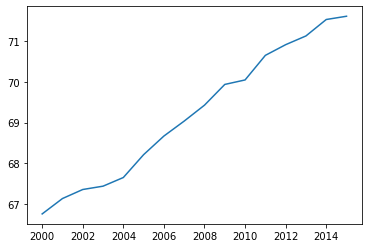

In [72]:
df1 = le.groupby('Year').mean()
x1 = pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]})
y1 = pd.DataFrame(df1['Life_expectancy'])
plt.plot(x1,y1)
plt.show

In [ ]:
fig = px.scatter(le, x='GDP', y='Life_expectancy',log_x=True)
fig.show()

In [48]:
le1['Adult_Mortality^2']=le1['Adult_Mortality']**2
le1['Adult_Mortality^3']=le1['Adult_Mortality']**3
le1['Adult_Mortality^4']=le1['Adult_Mortality']**4
le1['infant_deaths^2']=le1['infant_deaths']**2
le1['infant_deaths^3']=le1['infant_deaths']**3
le1['infant_deaths^4']=le1['infant_deaths']**4
le1['infant_deaths^5']=le1['infant_deaths']**5
le1['Alcohol^3']=le1['Alcohol']**3
le1['percentage_expenditure^2']=le1['percentage_expenditure']**2
le1['percentage_expenditure^3']=le1['percentage_expenditure']**3
le1['BMI^2']=le1['BMI']**2
le1['BMI^3']=le1['BMI']**3
le1['Diphtheria^3']=le1['Diphtheria']**3
le1['HIV_AIDS^2']=le1['HIV_AIDS']**2
le1['HIV_AIDS^3']=le1['HIV_AIDS']**3
le1['HIV_AIDS^4']=le1['HIV_AIDS']**4
le1['HIV_AIDS^5']=le1['HIV_AIDS']**5
le1['Population^2']=le1['Population']**2
le1['Population^3']=le1['Population']**3
le1['thinness_1_to_19_yrs ^2']=le1['thinness_1_to_19_yrs']**2
le1['thinness_1_to_19_yrs ^3']=le1['thinness_1_to_19_yrs']**3
le1['Income_composition_of_resources^2']=le1['Income_composition_of_resources']**2
le1['Income_composition_of_resources^3']=le1['Income_composition_of_resources']**3
le1['Income_composition_of_resources^4']=le1['Income_composition_of_resources']**4
le1['Total_expenditure*infanr_deaths']=le1['Total_expenditure']*le1['infant_deaths']
le1['Income_composition_of_resources*infant_deaths']= le1['Income_composition_of_resources']*le1['infant_deaths']
le1['Diphtheria*infant_deaths']=le1['Diphtheria']*le1['infant_deaths']
le1['Status_0*thinness_1_to_19_yrs']= le1['thinness_1_to_19_yrs']*le1['Status_0']
le1['Adult_Mortality*infant_deaths']= le1['Adult_Mortality']*le1['infant_deaths']
le1['BMI*Status_1']= le1['BMI']*le1['Status_1']
le1['HIV_AIDS*Adult_Mortality']= le1['HIV_AIDS']*le1['Adult_Mortality']

In [49]:
Y= le1['Life_expectancy']

In [50]:
le1.columns

Index(['Country', 'Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_to_19_yrs',
       'thinness_5_to_9_yrs', 'Income_composition_of_resources', 'Schooling',
       'Life_expectancy', 'Status_0', 'Status_1', 'Adult_Mortality^2',
       'Adult_Mortality^3', 'Adult_Mortality^4', 'infant_deaths^2',
       'infant_deaths^3', 'infant_deaths^4', 'infant_deaths^5', 'Alcohol^3',
       'percentage_expenditure^2', 'percentage_expenditure^3', 'BMI^2',
       'BMI^3', 'Diphtheria^3', 'HIV_AIDS^2', 'HIV_AIDS^3', 'HIV_AIDS^4',
       'HIV_AIDS^5', 'Population^2', 'Population^3', 'thinness_1_to_19_yrs ^2',
       'thinness_1_to_19_yrs ^3', 'Income_composition_of_resources^2',
       'Income_composition_of_resources^3',
       'Income_composition_of_resources^4', 'Total_expenditure*infanr_deaths',
       'Inc

In [51]:
X= le1.drop(['Country','Life_expectancy','Measles','under_five_deaths','Polio','GDP','thinness_5_to_9_yrs','Schooling'],axis=1)

In [52]:
X_train, X_test, Y_train,Y_test =  train_test_split(X,Y,test_size=0.2, random_state= 2)

In [53]:
model1 = lm.LinearRegression()
model1.fit(X_train,Y_train)
print(model1.coef_)
print(model1.intercept_)

[ 7.90010392e-02 -2.98473765e+00 -3.12719223e+00  5.86713560e-01
  9.67580265e-01 -2.74204651e-01  1.18840867e+00  1.70584027e-01
  2.10825473e+00 -6.51342295e+00  1.34268888e+00 -5.41219625e+00
  2.62927170e+00  1.06067403e+00 -1.06067403e+00 -1.88023600e+00
  7.10609201e-01 -1.02180518e-01  2.76748704e+00 -6.59489674e-01
  6.03535965e-02 -1.83749298e-03 -1.64944135e-01 -3.52050553e-01
  2.74694355e-02 -2.34419689e-01 -4.45630932e-01 -1.77837559e-01
  4.17025269e+00 -1.23548272e+00  1.37499230e-01 -5.08941424e-03
 -4.62998126e-01  1.81855463e-02  7.62133143e-01 -1.34798160e-01
 -4.40222507e-01  7.70689030e-01  3.60728994e-01  4.64651079e-01
  5.88884771e-01  2.60060531e-01  4.82830421e+00  2.48163000e-01
 -7.02251684e-01  8.65365753e-01]
-91.91123226127999


Testing the Model

In [54]:
pred= model1.predict(X_test)
print(mean_squared_error(Y_test,pred))

9.360245680334373


In [55]:
print(r2_score(Y_test,pred))

0.9047529510752192


In [56]:
kflod = KFold(n_splits= X.shape[0])  
test = cross_val_score(model1,X,Y,cv = kflod,scoring = 'neg_mean_squared_error',n_jobs=-1)  
print(np.mean(-test))

9.592053030373156


<Axes: xlabel='Life_expectancy', ylabel='Count'>

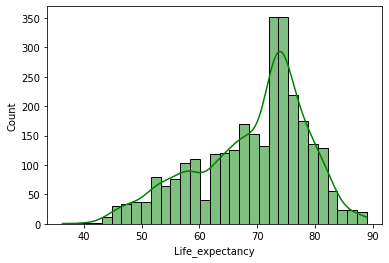

In [57]:
sns.histplot(le['Life_expectancy'].dropna(), kde=True, color='green')